# Iris Dataset clustering with K-means and 3D plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
# load iris dataset from sklearn library
iris = datasets.load_iris()

In [4]:
# DESCR contains details about iris dataset
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
print('Features:'+str(iris.feature_names))
print('Labels'+str(iris.target_names))

Features:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels['setosa' 'versicolor' 'virginica']


In [6]:
X = iris.data
y = iris.target

In [7]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [8]:
# import library for 3D plotting
from mpl_toolkits import mplot3d

# magic function for interactive plot
%matplotlib notebook

<IPython.core.display.Javascript object>


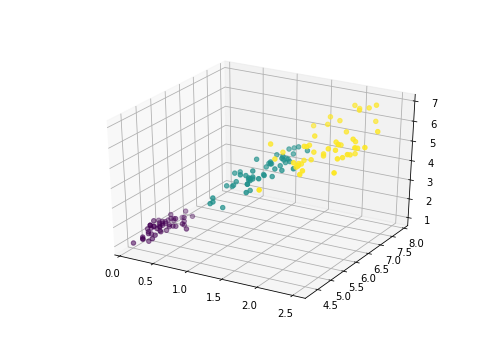

In [9]:
plt.figure('Iris dataset', figsize=(7,5))
ax = plt.axes(projection = '3d')
ax.scatter(X[:,3],X[:,0],X[:,2],c=y);

In [10]:
# import K-means algorithm from sklearn

from sklearn.cluster import KMeans

In [11]:
# set up hyperparameter (number of clusters)

k_means = KMeans(n_clusters=3)

In [24]:
# compute k-means clustering

k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
# compute cluster centers and predict cluster index for each sample

k_means_predicted = k_means.predict(X)

In [26]:
# calculate the accuracy

accuracy = round((np.mean(k_means_predicted==y))*100)
print('Accuracy:'+str(accuracy))

Accuracy:89.0


In [27]:
centroids = k_means.cluster_centers_

In [28]:
target_names = iris.target_names
colors = ['navy', 'turquoise', 'darkorange']

<IPython.core.display.Javascript object>


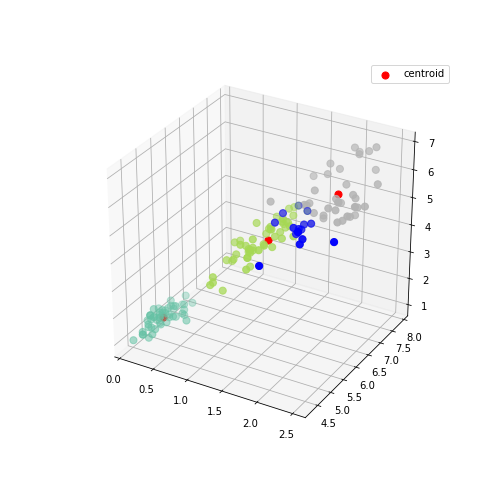

In [30]:
plt.figure('K-Means on Iris Dataset', figsize=(7,7))
ax = plt.axes(projection = '3d')
ax.scatter(X[:,3],X[:,0],X[:,2], c=y , cmap='Set2', s=50)

# color missclassified data

ax.scatter(X[k_means_predicted!=y,3],X[k_means_predicted!=y,0],X[k_means_predicted!=y,2] ,c='b', s=50)

# plot centroids

ax.scatter(centroids[0,3],centroids[0,0],centroids[0,2] ,c='r', s=50, label='centroid')
ax.scatter(centroids[1,3],centroids[1,0],centroids[1,2] ,c='r', s=50)
ax.scatter(centroids[2,3],centroids[2,0],centroids[2,2] ,c='r', s=50)

ax.legend()